In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

import functions

In [5]:
#seleciona o modelo
directory_df = "arquivos_Model1.csv"

In [33]:
#carrega os arquivos e já treina o pca
files, columns = functions.get_files(directory_df)
data = {}
pca = {}
for grandeza in columns["Grandeza"]:
    data[grandeza] = functions.get_all_data(grandeza, directory_df)
    pca[grandeza] = PCA().fit(np.concatenate([data[grandeza][x] for x in data[grandeza]]))

plota os gráficos da porcentagem da variância das principais componentes do pca cuja a soma seja maior que minimum_total%

In [48]:
def find_n_components(variance, minimum_total = 95):
    temp=0
    for x in range(variance.shape[0]):
        temp+=variance[x]
        if temp>=minimum_total:
            return x+1

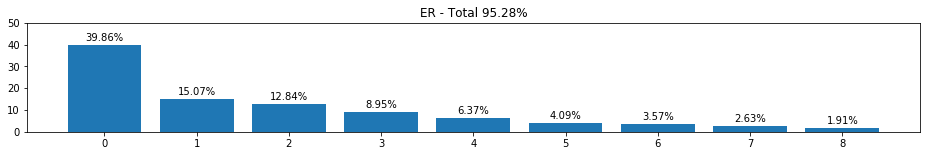

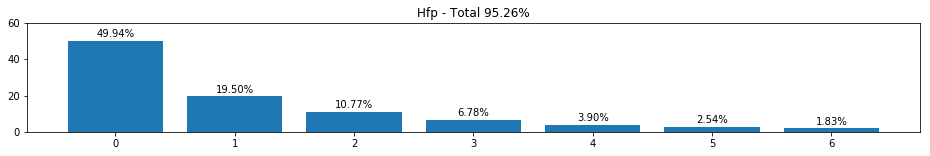

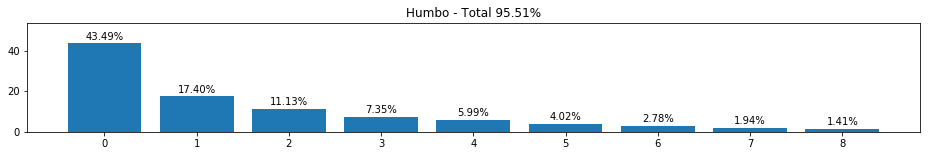

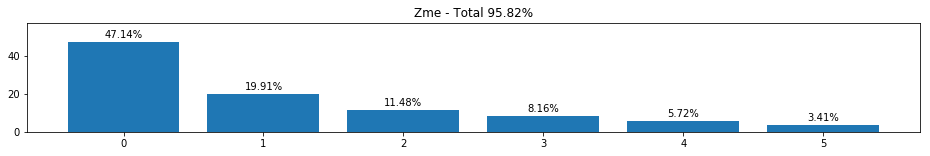

In [89]:
minimum_total = 95
for grandeza in columns["Grandeza"]:
    variance = pca[grandeza].explained_variance_
    n_components = find_n_components(variance, minimum_total)
    variance = variance[:n_components]
    
    width = 0.8
    fig, ax = plt.subplots(figsize=(16,2))
    ax.set_xticks(np.arange(len(variance)))
    ax.set_title(grandeza + " - Total %.2f%%" %sum(variance[:n_components]))
    plt.ylim(0, variance[0]+10)
    rects = plt.bar(np.arange(len(variance)), variance, width)
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f%%' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    plt.show()
    plt.close('all')

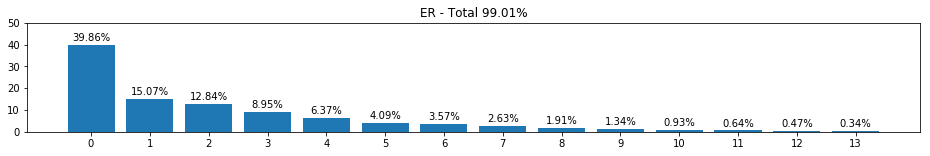

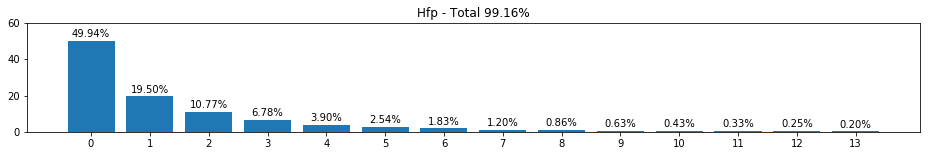

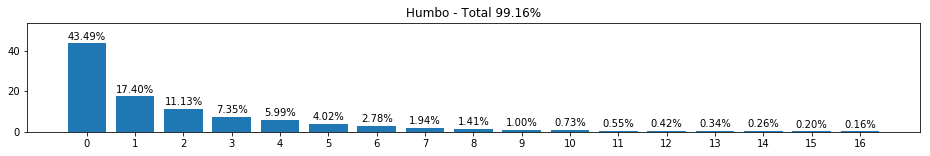

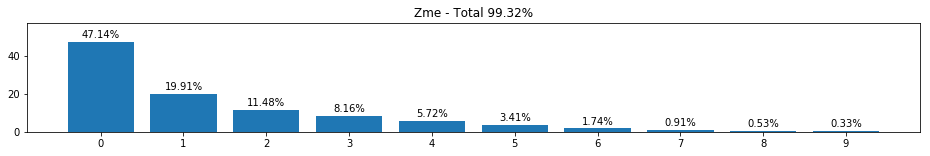

In [88]:
minimum_total = 99
for grandeza in columns["Grandeza"]:
    variance = pca[grandeza].explained_variance_
    n_components = find_n_components(variance, minimum_total)
    variance = variance[:n_components]
    
    width = 0.8
    fig, ax = plt.subplots(figsize=(16,2))
    ax.set_xticks(np.arange(len(variance)))
    ax.set_title(grandeza + " - Total %.2f%%" %sum(variance[:n_components]))
    plt.ylim(0, variance[0]+10)
    rects = plt.bar(np.arange(len(variance)), variance, width)
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f%%' %height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    plt.show()
    plt.close('all')